# INF2178 Final Project

## #To Do List:

•	Preliminary Work **DONE**

    •	Evaluate the data **DONE**
    
    •	Check descriptive statistics **DONE**
    
    •	Check for adherence to Tidy Data Principles **DONE**
    
    •	Adjust for missing values **DONE**
    
    •	Create Categorical Variables **DONE**
    
    •	Testing GLM assumptions **DONE**
    
    
•	Exploratory Data Analysis (EDA) through visualization and comparing the attributes of interest via T-Test **DONE**

•	Analysis of Variance (ANOVA), both one-way and two-way **DONE**

•	Multiple Linear Regression (MLR) **DONE**

•	Complete Accompanying Write-up **DONE**

## Additions for final

•	Minor component of the larger-scale implications of the study **DONE**

•	P-values and standard deviation not organized in properly formatted table. **DONE**

•	Confidence intervals, Parameter estimates, effect sizes not calculated or discussed. **DONE**

•	Add a ANCOVA analysis with ANCOVA **DONE**

•	Explore a power analysis universe given a variety of effect sizes, Type II error and sample sizes for this dataset.     Comment critically on this in your writeup. **DONE**


*************************************************************

Initial research quesiton - Does having higher BMI predict insulin levels?

**Research Question -** Does having a higher BMI and BP predict one's glucose levels?

**Background Information on Dataset**
From: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

*Context*
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes. 

*Content*
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)

*Sources:*
(a) Original owners: National Institute of Diabetes and Digestive and Kidney Diseases 
(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu) Research Center, RMI Group Leader Applied Physics Laboratory The Johns Hopkins University Johns Hopkins Road Laurel, MD 20707 (301) 953-6231 
(c) Date received: 9 May 1990

Number of Instances: 768 
Number of Attributes: 8 plus class 
For Each Attribute: (all numeric-valued)
    1. Number of times pregnant
    2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    3. Diastolic blood pressure (mm Hg)
    4. Triceps skin fold thickness (mm)
    5. 2-Hour serum insulin (mu U/ml)
    6. Body mass index (weight in kg/(height in m)^2)
    7. Diabetes pedigree function
    8. Age (years)
    9. Class variable (0 or 1)

Missing Attribute Values: Yes 
Class Distribution: (class value 1 is interpreted as "tested positive for diabetes")

## Data Description, Cleaning and Pre-Processing

In [1]:
# Importing everything!
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import statistics
import statsmodels.api as sm
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from sklearn import metrics
from statsmodels.graphics.factorplots import interaction_plot
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
from dfply import *
from pingouin import ancova
import pingouin as pg
init_notebook_mode()

In [2]:
# Load dataset
df = pd.read_csv("diabetes.csv")

In [3]:
# create list of column names for clean-up
col_names = [column for column in df.loc[:,:'Age'].columns]
col_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [4]:
#Check values at top and bottom to get a sense if there is any ordering.
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [5]:
df.tail(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
758            1      106             76              0        0  37.5   
759            6      190             92              0        0  35.5   
760            2       88             58             26       16  28.4   
761            9      170             74             31        0  44.0   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
758                     0.197   26        0  
759                     0.278   66        1  
760                     0.766   22        0  
761                     0.403   43        1  
762                     0.142   33        0  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [6]:
# Descriptive statistics - shows counts, means, standard deviations, and quartiles
#Zero values for Glucose, BloodPressure, Skin Thickness, Insulin and BMI do not make sense
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
df.info()
if df.isnull().values.any() == False:
    print("\n\nThere are no null values")
else:
    print("\n\nThere are null values - please check")
# The feature types are correct and there are no null values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are no null values


In [8]:
# Count zeroes in all columns of Dataframe
    # Reference: V. (n.d.). Count number of Zeros in Pandas Dataframe Column. thisPointer. 
    #            https://thispointer.com/count-number-of-zeros-in-pandas-dataframe-column/

for column_name in df.columns:
    column = df[column_name]
    
    # Get the count of zeros in each column 
    count = (column == 0).sum()
    print('Count of zeroes in column', column_name, ' is : ', count)

Count of zeroes in column Pregnancies  is :  111
Count of zeroes in column Glucose  is :  5
Count of zeroes in column BloodPressure  is :  35
Count of zeroes in column SkinThickness  is :  227
Count of zeroes in column Insulin  is :  374
Count of zeroes in column BMI  is :  11
Count of zeroes in column DiabetesPedigreeFunction  is :  0
Count of zeroes in column Age  is :  0
Count of zeroes in column Outcome  is :  500


**NOTE:** Implication of high number of zero values for predictor variables - lack of data (greater than 10%) can result in biased statistical analyses and lead to misleading results (e.g., see insulin and skin thickness)

Reference: Bennett, D. A. (2001). How can I deal with missing data in my study? Australian and New Zealand Journal of Public Health, 25(5), 464–469. https://doi.org/10.1111/j.1467-842x.2001.tb00294.x

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

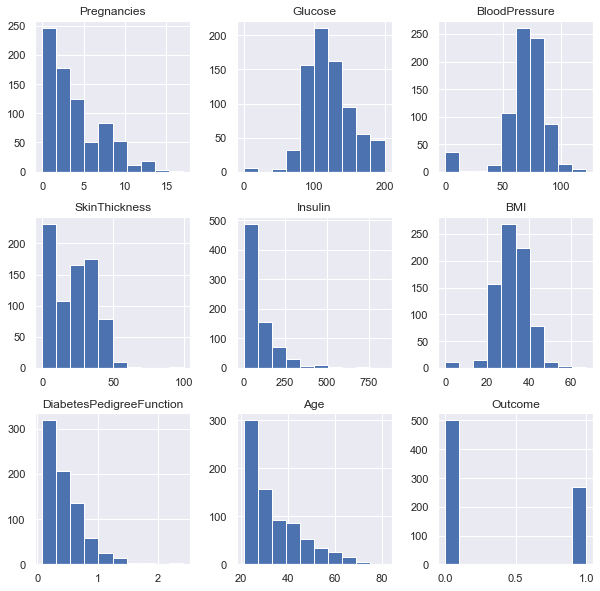

In [9]:
# Histogram displaying data from all columns
sns.set(font_scale = 1)
df.hist(bins = 10, figsize = (10, 10))

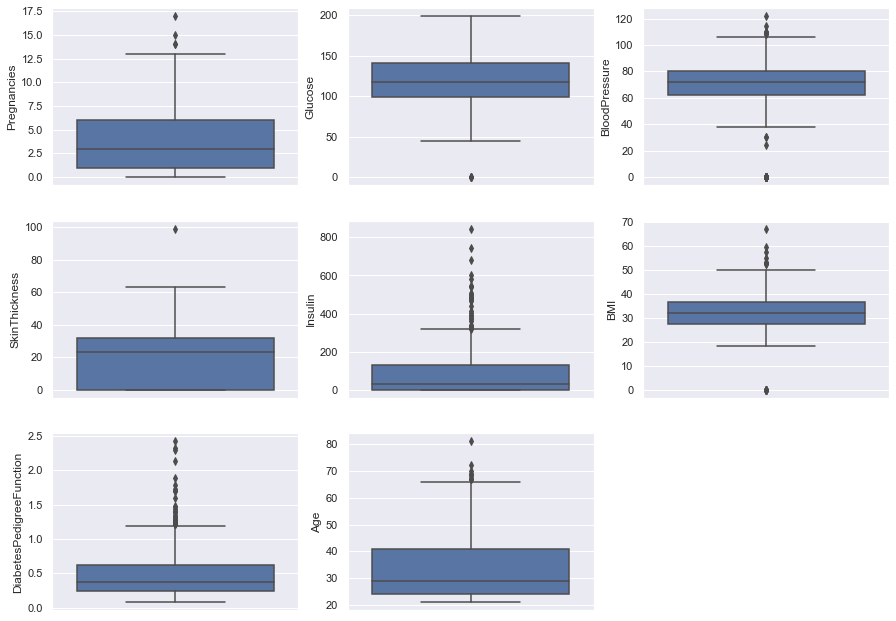

In [10]:
# Box plots for all attributes to show outliers
count=1
plt.figure(figsize=(15, 15))
for value in col_names:
    plt.subplot(4,3,count)
    ax = sns.boxplot(y=value, data=df)
    count+=1

### Cleaning - Tidy Data Principles

Reference: Marino, R. (2021, December 13). What’s Tidy Data? - Towards Data Science. Medium. 
           https://towardsdatascience.com/whats-tidy-data-how-to-organize-messy-datasets-in-python-with-melt-and-pivotable-functions-5d52daa996c9

Wickham, H. . (2014). Tidy Data. Journal of Statistical Software, 59(10), 1–23. https://doi.org/10.18637/jss.v059.i10

• Each variable forms a column- **CHECK**

• Each observation forms a row- **CHECK**

• Each type of observational unit forms a table- **CHECK**

What do we do with missing values?
    **Reference for suggestions on how to handle missing data:**
    Dong, Y., & Peng, C. Y. J. (2013). Principled missing data methods for researchers. SpringerPlus, 2(1).
    https://doi.org/10.1186/2193-1801-2-222
    
    Zhang Z. (2016). Missing data imputation: focusing on single imputation. Annals of translational medicine, 4(1), 9. https://doi.org/10.3978/j.issn.2305-5839.2015.12.38
    
Zhangs work in 2016 highlights that imputing with the median is a quick and dirty method appropriate for only a handful of missing data. He suggests that doing central tendency imputation underestimates variance and ignores relationship with other variables. For the purpose of our testing, we are assuming that the variables are independent and can test for variance after the imputation.
    
 - There can be a value of 0 for pregnancies, but not for other attributes
 - Insulin should not have a value of 0; however, low levels of insulin were often not detectable and so recorded as 0.
   Reference: MacGill, M. (2013, October 11). Finding in type 1 diabetes overturns idea of zero insulin. Medical News Today. 
   https://www.medicalnewstoday.com/articles/267241
           
**Decision:** We replace the missing values for the predictor variables - "Glucose", "Blood Pressure", and "BMI" - with the median of the data in the corresponding column according to the outcome (i.e., diabetic versus non-diabetic)

In [11]:
# Calculating the medians of glucose levels for each outcome while not including existing zero values
db_df = df.loc[df["Outcome"] == 1, ["Glucose"]]
ndb_df = df.loc[df["Outcome"] == 0, ["Glucose"]]
gluc_db_df = db_df[db_df.Glucose != 0].median()
gluc_ndb_df = ndb_df[ndb_df.Glucose != 0].median()
gluc_db_median, gluc_ndb_median = int(round(gluc_db_df["Glucose"])), int(round(gluc_ndb_df["Glucose"]))
print(gluc_db_median, gluc_ndb_median)

140 107


In [12]:
# Calculating the medians of BP levels for each outcome while not including existing zero values
db_df = df.loc[df["Outcome"] == 1, ["BloodPressure"]]
ndb_df = df.loc[df["Outcome"] == 0, ["BloodPressure"]]
bp_db_df = db_df[db_df.BloodPressure != 0].median()
bp_ndb_df = ndb_df[ndb_df.BloodPressure != 0].median()
bp_db_median, bp_ndb_median = int(round(bp_db_df["BloodPressure"])), int(round(bp_ndb_df["BloodPressure"]))
print(bp_db_median, bp_ndb_median)

74 70


In [13]:
# Calculating the medians of BMI for each outcome while not including existing zero values
db_df = df.loc[df["Outcome"] == 1, ["BMI"]]
ndb_df = df.loc[df["Outcome"] == 0, ["BMI"]]
bmi_db_df = db_df[db_df.BMI != 0].median()
bmi_ndb_df = ndb_df[ndb_df.BMI != 0].median()
bmi_db_median, bmi_ndb_median = round(bmi_db_df["BMI"],1), round(bmi_ndb_df["BMI"],1)
print(bmi_db_median, bmi_ndb_median)

34.3 30.1


In [14]:
# Populate original dataframe with new adjusted categorized medians

# Glucose
for index, row in df.iterrows():
    if row[1]== 0 and row[8] == 0:
        df.loc[index,"Glucose"] = gluc_ndb_median
    elif row[1]== 0 and row[8] == 1:
        df.loc[index,"Glucose"] = gluc_db_median   

# Blood Pressure
for index, row in df.iterrows():
    if row[2]== 0 and row[8] == 0:
        df.loc[index,"BloodPressure"] = bp_ndb_median
    elif row[2]== 0 and row[8] == 1:
        df.loc[index,"BloodPressure"] = bp_db_median

# BMI        
for index, row in df.iterrows():
    if row[5]== 0.0 and row[8] == 0:
        df.loc[index,"BMI"] = bmi_ndb_median
    elif row[5]== 0.0 and row[8] == 1:
        df.loc[index,"BMI"] = bmi_db_median

In [15]:
# Check that all zeroes in the columns for the above attributes have been replaced with medians
for column_name in df.columns:
    column = df[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Pregnancies  is :  111
Count of zeros in column  Glucose  is :  0
Count of zeros in column  BloodPressure  is :  0
Count of zeros in column  SkinThickness  is :  227
Count of zeros in column  Insulin  is :  374
Count of zeros in column  BMI  is :  0
Count of zeros in column  DiabetesPedigreeFunction  is :  0
Count of zeros in column  Age  is :  0
Count of zeros in column  Outcome  is :  500


In [16]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.677083      72.378906      20.536458   79.799479   
std       3.369578   30.464161      12.104431      15.952218  115.244002   
min       0.000000   44.000000      24.000000       0.000000    0.000000   
25%       1.000000   99.750000      64.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.434635                  0.471876   33.240885    0.348958  
std      6.880498                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.050000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Comparing the central tendencies of the dataframe prior to and after replacing missing values for Glucose, Blood Pressure and BMI indicate that there wasn't much change except for the standard deviation of Blood Pressure. This bolsters Zhangs warning about the impact to variance when the missing data is more than a handful of values (BP missing ~35 values)

## Creating Categorical Variables - Binning

According to Health Canada, the following is the classification for evaluating BMI for women entering pregnancy:
- Underweight = BMI < 18.5
- Normal weight = 18.5 < BMI < 24.9
- Overweight = 25 < BMI < 29.9
- Obese = BMI > 30

Reference: Health Canada. (n.d.). Prenatal Nutrition Guidelines for Health Professionals: Gestational Weight Gain - Canada.ca. Government of Canada. https://www.canada.ca/en/health-canada/services/canada-food-guide/resources/prenatal-nutrition/eating-well-being-active-towards-healthy-weight-gain-pregnancy-2010.html#a6

Given this recommendation for the BMI classification, we can add a new column to the dataframe.

In [17]:
# Create column with BMI categories
df["BMIcat"]=""
for index, row in df.iterrows():
    if row[5] < 18.5:
        df.loc[index,"BMIcat"]="1-Underweight"
    elif row[5] <= 24.9:
        df.loc[index,"BMIcat"]="2-Normal"
    elif row[5] <= 29.9:
        df.loc[index,"BMIcat"]="3-Overweight"
    elif row[5] >= 30:
        df.loc[index,"BMIcat"]="4-Obese"
df.head()
print(df['BMIcat'].value_counts().sort_index())

1-Underweight      4
2-Normal         102
3-Overweight     179
4-Obese          483
Name: BMIcat, dtype: int64


Health Canada also uses the following age groups to compare BMI: 
- 20-24
- 25-29
- 30-34
- 35-39
- 40+

Reference: Health Canada. (n.d.). Prenatal Nutrition Guidelines for Health Professionals: Gestational Weight Gain - Canada.ca. Government of Canada. https://www.canada.ca/en/health-canada/services/canada-food-guide/resources/prenatal-nutrition/eating-well-being-active-towards-healthy-weight-gain-pregnancy-2010.html#a6

Note that, given the dataset for the purpose of this midterm project, the 20-24 age group is modified to 21-24.

In [18]:
# Create column with age categories
df["AGEcat"]=""
for index, row in df.iterrows():
    if row[7] <= 24:
        df.loc[index,"AGEcat"]="Age-21-24"
    elif 25 <= row[7] <= 29:
        df.loc[index,"AGEcat"]="Age-25-29"
    elif 30 <= row[7] <= 34:
        df.loc[index,"AGEcat"]="Age-30-34"
    elif 35 <= row[7] <= 39:
        df.loc[index,"AGEcat"]="Age-35-39"
    elif row[7] >= 40:
        df.loc[index,"AGEcat"]="Age-40+"
df.head()
print(df['AGEcat'].value_counts().sort_index())

Age-21-24    219
Age-25-29    177
Age-30-34     92
Age-35-39     73
Age-40+      207
Name: AGEcat, dtype: int64


According to the Public Health Agency of Canada (PHAC), diastolic blood pressure (BP) below 80 mm Hg is considered normal blood pressure while diastolic BP greater than 80 mm Hg is high blood pressure.

Reference: Public Health Agency of Canada. (n.d.). Hypertension - Canada.ca. Government of Canada. https://www.canada.ca/en/public-health/services/chronic-diseases/cardiovascular-disease/hypertension.html

In [19]:
# Create column with blood pressure categories
df["BPcat"]=""
for index, row in df.iterrows():
    if row[2] < 80:
        df.loc[index,"BPcat"]="Normal"
    elif row[2] >= 80:
        df.loc[index,"BPcat"]="High"
df.head()
print(df['BPcat'].value_counts().sort_index())

High      205
Normal    563
Name: BPcat, dtype: int64


In [20]:
# Create column with glucose categories
df["Gluccat"]=""
for index, row in df.iterrows():
    if row[1] < 126:
        df.loc[index,"Gluccat"]="Normal"
    elif row[1] >= 126:
        df.loc[index,"Gluccat"]="High"
df.head()
print(df['Gluccat'].value_counts().sort_index())

High      299
Normal    469
Name: Gluccat, dtype: int64


### Testing GLM Assumption - Normality - Shapiro-Wilk Test

In [21]:
#Testing Normality with Shapiro-Wilk Test
preg_shapiro = stats.shapiro(df['Pregnancies'])
gluc_shapiro = stats.shapiro(df['Glucose'])
bp_shapiro = stats.shapiro(df['BloodPressure'])
skth_shapiro = stats.shapiro(df['SkinThickness'])
ins_shapiro = stats.shapiro(df['Insulin'])
bmi_shapiro = stats.shapiro(df['BMI'])
dpf_shapiro = stats.shapiro(df['DiabetesPedigreeFunction'])
age_shapiro = stats.shapiro(df['Age'])
print("Pregnancies - ", preg_shapiro)
print("Glucose - ", gluc_shapiro)
print("BloodPressure - ", bp_shapiro)
print("SkinThickness - ", skth_shapiro)
print("Insulin - ", ins_shapiro)
print("BMI - ", bmi_shapiro)
print("DiabetesPedigreeFunction - ", dpf_shapiro)
print("Age - ", age_shapiro)

Pregnancies -  ShapiroResult(statistic=0.9042782783508301, pvalue=1.6080885881590613e-21)
Glucose -  ShapiroResult(statistic=0.9697533249855042, pvalue=1.6375369810139873e-11)
BloodPressure -  ShapiroResult(statistic=0.9880667328834534, pvalue=6.635423687839648e-06)
SkinThickness -  ShapiroResult(statistic=0.90462726354599, pvalue=1.75157635361056e-21)
Insulin -  ShapiroResult(statistic=0.7220207452774048, pvalue=7.915248149269491e-34)
BMI -  ShapiroResult(statistic=0.9791935682296753, pvalue=5.41224309813515e-09)
DiabetesPedigreeFunction -  ShapiroResult(statistic=0.8365186452865601, pvalue=2.477696547502535e-27)
Age -  ShapiroResult(statistic=0.8747662305831909, pvalue=2.401946561183188e-24)


Interpretation of Results:
For all predictor variables, the p-value is less than 0.05, so it is statistically significant. Therefore, we can reject the null hypothesis (H_0) that the data in each column is normally distributed.
Despite this, we can analyze the data considering the sample size and will continue for the sake of this midterm project.

### Testing GLM Assumption - Homogeneity of Variance - Levene's Test
Because the data from the samples is shown to not be normal, we use Levene's test  to check for homogeneity of variance among the variables of interest.

In [22]:
# Glucose and Age
res=stat()
res.levene(df = df, res_var="Glucose", xfac_var = "Age")
print("Levene Result for",value)
print(res.levene_summary)

Levene Result for Age
                 Parameter    Value
0      Test statistics (W)   1.2274
1  Degrees of freedom (Df)  51.0000
2                  p value   0.1384


P-Value is not less than 0.05, so we fail to reject the null hypothesis. We do not have enough evidence to say that the variances of glucose and age is significantly different.

In [23]:
# Glucose and Blood Pressure
res=stat()
res.levene(df = df, res_var="Glucose", xfac_var = "BloodPressure")
print("Levene Result for",value)
print(res.levene_summary)

Levene Result for Age
                 Parameter    Value
0      Test statistics (W)   1.1448
1  Degrees of freedom (Df)  45.0000
2                  p value   0.2427


P-Value is not less than 0.05, so we fail to reject the null hypothesis. We do not have enough evidence to say that the variance between glucose and blood pressure is significantly different.

In [24]:
# Glucose and BMI
res=stat()
res.levene(df = df, res_var="Glucose", xfac_var = "BMI")
print("Levene Result for",value)
print(res.levene_summary)

Levene Result for Age
                 Parameter     Value
0      Test statistics (W)    0.9559
1  Degrees of freedom (Df)  246.0000
2                  p value    0.6547


P-Value is not less than 0.05, so we fail to reject the null hypothesis. We do not have enough evidence to say that the variance between glucose and BMI is significantly different.

In [25]:
res=stat()
res.levene(df = df, res_var="BloodPressure", xfac_var = "Age")
print("Levene Result for",value)
print(res.levene_summary)

Levene Result for Age
                 Parameter    Value
0      Test statistics (W)   0.9565
1  Degrees of freedom (Df)  51.0000
2                  p value   0.5621


P-Value is not less than 0.05, so we fail to reject the null hypothesis. We do not have enough evidence to say that the variance between blood pressure and age is significantly different.

In [26]:
res=stat()
res.levene(df = df, res_var="BloodPressure", xfac_var = "BMI")
print("Levene Result for",value)
print(res.levene_summary)

Levene Result for Age
                 Parameter     Value
0      Test statistics (W)    1.1184
1  Degrees of freedom (Df)  246.0000
2                  p value    0.1488


P-Value is not less than 0.05, so we fail to reject the null hypothesis. We do not have enough evidence to say that the variance between blood pressure and BMI is significantly different.

According to the Levene's tests, all variables of interest have equal variance.

## Exploratory Data Analysis - Visualization + T-Test

### Correlation Matrix

<AxesSubplot:>

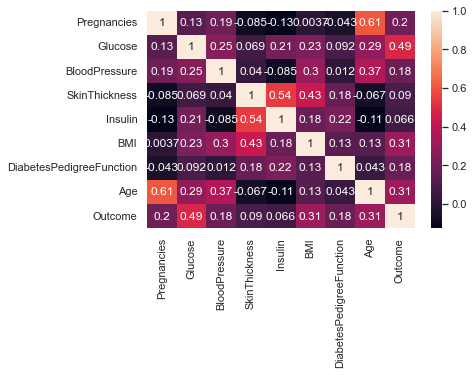

In [27]:
corr_matrix = df.corr(method='spearman')
sns.heatmap(corr_matrix,annot = True)

From the correlation matrix, it is revealed that there is a:
- low positive correlation between age and glucose with a correlation coefficient of 0.29 
- low positive correlation between BP and glucose with a correlation coefficient of 0.25 
- low positive correlation between BMI and glucose with a correlation coefficient of 0.23
- moderate positive correlation between age and BP with a correlation coefficient of 0.37
- moderate positive correlation between age and BMI with a correlation coefficient of 0.3

Reference: Statistics Solutions. (2021, June 9). Pearson’s Correlation Coefficient. https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/#:%7E:text=High%20degree%3A%20If%20the%20coefficient,to%20be%20a%20small%20correlation.

### Box Plots of Binned Variables

[(30.0, 220.0)]

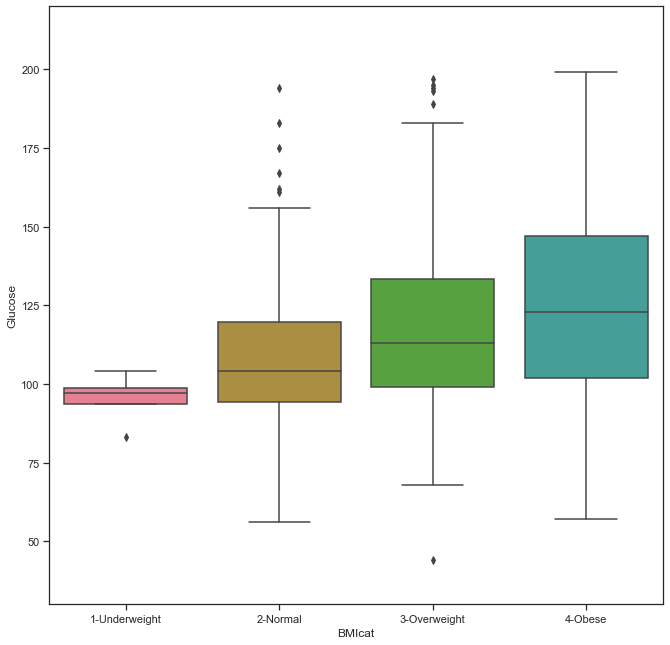

In [28]:
# Box plot of BMIcat versus Glucose 
sns.set_theme(style="ticks", palette="husl")
figsns=plt.figure(3,figsize=(11,11))
ax = sns.boxplot(x="BMIcat", y="Glucose", data=df, order=["1-Underweight", "2-Normal", "3-Overweight", "4-Obese"])

# Limit y-axis
ax.set(ylim=(30,220))

[(30.0, 220.0)]

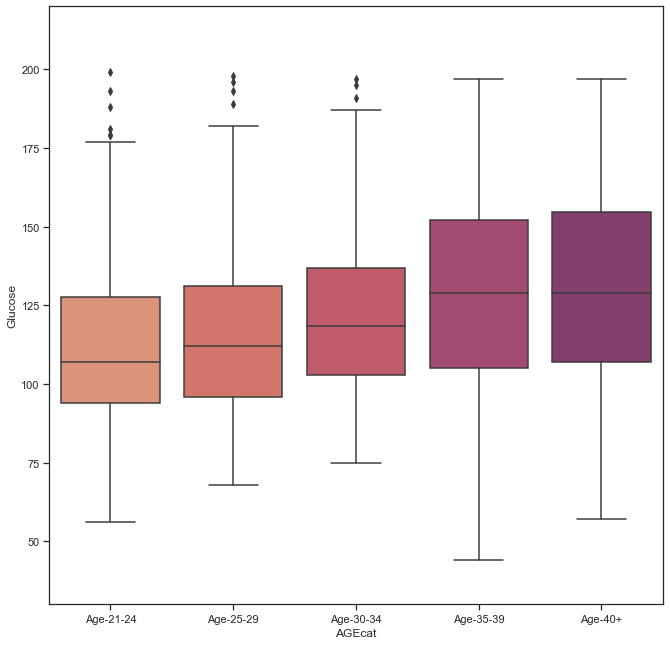

In [29]:
# Box plot of AGEcat versus Glucose 
sns.set_theme(style="ticks", palette="flare")
figsns=plt.figure(3,figsize=(11,11))
ax = sns.boxplot(x="AGEcat", y="Glucose", data=df, order=["Age-21-24", "Age-25-29", "Age-30-34","Age-35-39", "Age-40+"])

# Limit y-axis
ax.set(ylim=(30,220))

[(30.0, 220.0)]

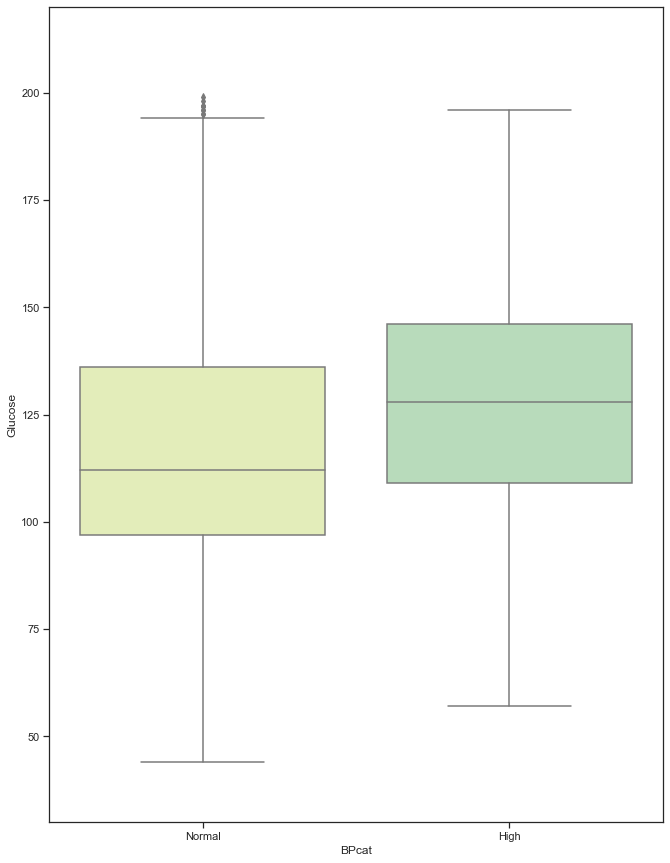

In [30]:
# Box plot of BPcat versus Glucose 
sns.set_theme(style="ticks", palette="YlGnBu")
figsns=plt.figure(3,figsize=(11,15))
ax = sns.boxplot(x="BPcat", y="Glucose", data=df, order=["Normal", "High"])

# Limit y-axis
ax.set(ylim=(30,220))

### T-Tests

In [31]:
# Independent Sample T-tests - Determine if the relationships between Glucose and BP, BMI, and Age are statistically significant 
tStat, pValue = stats.ttest_ind(df['Glucose'],df['BMI'], equal_var=False)
print("Glucose & BMI - P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

tStat, pValue = stats.ttest_ind(df['Glucose'],df['BloodPressure'], equal_var=False)
print("Glucose & BP - P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

tStat, pValue = stats.ttest_ind(df['Glucose'],df['Age'], equal_var=False)
print("Glucose & Age - P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

tStat, pValue = stats.ttest_ind(df['BMI'],df['BloodPressure'], equal_var=False)
print("BMI & BP - P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

tStat, pValue = stats.ttest_ind(df['BMI'],df['Age'], equal_var=False)
print("BMI & Age - P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

tStat, pValue = stats.ttest_ind(df['BloodPressure'],df['Age'], equal_var=False)
print("BP & Age - P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

Glucose & BMI - P-Value:0.0 T-Statistic:79.18798635302868
Glucose & BP - P-Value:4.0026873382920545e-221 T-Statistic:41.67653659116029
Glucose & Age - P-Value:0.0 T-Statistic:75.05110574594777
BMI & BP - P-Value:0.0 T-Statistic:-79.50467613022954
BMI & Age - P-Value:0.10128636196400516 T-Statistic:-1.6398704229939218
BP & Age - P-Value:0.0 T-Statistic:64.26788323622993


## ANOVAs

### One-Way ANOVAs

In [32]:
# BP & Glucose ONE-WAY ANOVA
model = ols('Glucose ~ BPcat', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df          F    PR(>F)
BPcat      16531.812174    1.0  18.212966  0.000022
Residual  695294.104492  766.0        NaN       NaN

P < 0.05 implies that BP levels do impact Glucose levels

In [33]:
# Post Hoc Tukey HSD with Bonferroni Correction
pair_t = model.t_test_pairwise('BPcat') 
pair_t.result_frame

coef   std err         t     P>|t|  Conf. Int. Low  \
Normal-High -10.488411  2.457646 -4.267665  0.000022      -15.312933   

             Conf. Int. Upp.  pvalue-hs  reject-hs  
Normal-High         -5.66389   0.000022       True

Given that we chose to categorize BP levels into two categories, it's evident that those categories have an effect.

There is a significant difference in glucose levels between women with normal blood pressure and those with high blood pressure.

In [34]:
# BMI & Glucose ONE-WAY ANOVA
model = ols('Glucose ~ BMIcat', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df         F        PR(>F)
BMIcat     33535.554762    3.0  12.59105  4.847415e-08
Residual  678290.361905  764.0       NaN           NaN

P < 0.05 implies that BMI levels do impact Glucose level for the participant

In [35]:
# Post Hoc Tukey HSD with Bonferroni Correction
pair_t = model.t_test_pairwise('BMIcat') 
pair_t.result_frame

coef    std err         t         P>|t|  \
2-Normal-1-Underweight      13.779412  15.187420  0.907291  3.645389e-01   
3-Overweight-1-Underweight  21.694134  15.063649  1.440165  1.502305e-01   
4-Obese-1-Underweight       31.070911  14.959672  2.076978  3.813721e-02   
3-Overweight-2-Normal        7.914722   3.696474  2.141154  3.257738e-02   
4-Obese-2-Normal            17.291499   3.246874  5.325584  1.324618e-07   
4-Obese-3-Overweight         9.376777   2.607294  3.596363  3.434493e-04   

                            Conf. Int. Low  Conf. Int. Upp.     pvalue-hs  \
2-Normal-1-Underweight          -16.034615        43.593439  3.645389e-01   
3-Overweight-1-Underweight       -7.876921        51.265189  2.778917e-01   
4-Obese-1-Underweight             1.703970        60.437852  1.240790e-01   
3-Overweight-2-Normal             0.658270        15.171175  1.240790e-01   
4-Obese-2-Normal                 10.917646        23.665353  7.947702e-07   
4-Obese-3-Overweight              4.258465        14.495088  1.716068e-03   

                            reject-hs  
2-Normal-1-Underweight          False  
3-Overweight-1-Underweight      False  
4-Obese-1-Underweight           False  
3-Overweight-2-Normal           False  
4-Obese-2-Normal                 True  
4-Obese-3-Overweight             True

There is a significant difference in glucose levels between women classified as being normal and those who are obese. The same result is shown when comparing the glucose levels of overweight and obese women.

### Two-Way ANOVAs

In [36]:
res=stat()
res.anova_stat(df=df, res_var='Glucose',anova_model='Glucose ~ C(BMIcat) + C(BPcat) + C(BMIcat):C(BPcat)')
res.anova_summary

df         sum_sq        mean_sq           F  \
C(BMIcat)             3.0  945299.340707  315099.780236  359.031504   
C(BPcat)              1.0    9727.057596    9727.057596   11.083220   
C(BMIcat):C(BPcat)    3.0     885.704496     295.234832    0.336397   
Residual            761.0  667882.706528     877.638248         NaN   

                           PR(>F)  
C(BMIcat)           3.179098e-145  
C(BPcat)             9.130536e-04  
C(BMIcat):C(BPcat)   7.990296e-01  
Residual                      NaN

In [37]:
#TukeyHSD with Bonferoni Correction
res=stat()
res.tukey_hsd(df=df, res_var='Glucose', xfac_var='BMIcat',anova_model='Glucose ~ C(BMIcat) + C(BPcat) + C(BMIcat):C(BPcat)')
res.tukey_summary

C:\Users\Rahul SJ\AppData\Local\Programs\Python\Python310\lib\site-packages\bioinfokit\analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



group1         group2       Diff      Lower      Upper   q-value  \
0       4-Obese   3-Overweight   9.376777   2.702228  16.051326  5.115427   
1       4-Obese       2-Normal  17.291499   8.979657  25.603341  7.575052   
2       4-Obese  1-Underweight  31.070911  -7.225135  69.366957  2.954271   
3  3-Overweight       2-Normal   7.914722  -1.548076  17.377520  3.045554   
4  3-Overweight  1-Underweight  21.694134 -16.868087  60.256356  2.048474   
5      2-Normal  1-Underweight  13.779412 -25.099658  52.658481  1.290521   

    p-value  
0  0.001805  
1  0.001000  
2  0.157686  
3  0.137298  
4  0.470496  
5  0.773089

In [38]:
#TukeyHSD with Bonferoni Correction
res=stat()
res.tukey_hsd(df=df, res_var='Glucose', xfac_var='BPcat',anova_model='Glucose ~ C(BMIcat) + C(BPcat) + C(BMIcat):C(BPcat)')
res.tukey_summary


C:\Users\Rahul SJ\AppData\Local\Programs\Python\Python310\lib\site-packages\bioinfokit\analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



group1 group2       Diff    Lower      Upper   q-value  p-value
0  Normal   High  10.488411  5.74439  15.232433  6.137867    0.001

In [39]:
#TukeyHSD with Bonferoni Correction
res=stat()
res.tukey_hsd(df=df, res_var='Glucose', xfac_var=['BMIcat','BPcat'],anova_model='Glucose ~ C(BMIcat) + C(BPcat) + C(BMIcat):C(BPcat)')
res.tukey_summary

C:\Users\Rahul SJ\AppData\Local\Programs\Python\Python310\lib\site-packages\bioinfokit\analys.py:369: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\Rahul SJ\AppData\Local\Programs\Python\Python310\lib\site-packages\bioinfokit\analys.py:862: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Rahul SJ\AppData\Local\Programs\Python\Python310\lib\site-packages\bioinfokit\analys.py:870: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Rahul SJ\AppData\Local\Programs\Python\Python310\lib\site-packages\bioinfokit\analys.py:873: RuntimeWarning:

divide by zero encountered in true_divide



group1                   group2       Diff      Lower  \
0         (4-Obese, Normal)          (4-Obese, High)   7.536227  -1.225193   
1         (4-Obese, Normal)   (3-Overweight, Normal)   8.798415  -0.142742   
2         (4-Obese, Normal)     (3-Overweight, High)   1.581900 -15.095772   
3         (4-Obese, Normal)       (2-Normal, Normal)  16.616262   5.653945   
4         (4-Obese, Normal)         (2-Normal, High)   6.063321 -16.335129   
5         (4-Obese, Normal)  (1-Underweight, Normal)  28.636850 -16.657830   
6         (4-Obese, Normal)    (1-Underweight, High)   0.000000       -inf   
7           (4-Obese, High)   (3-Overweight, Normal)  16.334642   5.984711   
8           (4-Obese, High)     (3-Overweight, High)   5.954327 -11.519125   
9           (4-Obese, High)       (2-Normal, Normal)  24.152489  12.013742   
10          (4-Obese, High)         (2-Normal, High)  13.599548  -9.397568   
11          (4-Obese, High)  (1-Underweight, Normal)  36.173077  -9.420616   
12          (4-Obese, High)    (1-Underweight, High)   0.000000       -inf   
13   (3-Overweight, Normal)     (3-Overweight, High)  10.380315  -7.183949   
14   (3-Overweight, Normal)       (2-Normal, Normal)   7.817847  -4.451259   
15   (3-Overweight, Normal)         (2-Normal, High)   2.735094 -20.331096   
16   (3-Overweight, Normal)  (1-Underweight, Normal)  19.838435 -25.790138   
17   (3-Overweight, Normal)    (1-Underweight, High)   0.000000       -inf   
18     (3-Overweight, High)       (2-Normal, Normal)  18.198162  -0.476191   
19     (3-Overweight, High)         (2-Normal, High)   7.645221 -19.377910   
20     (3-Overweight, High)  (1-Underweight, Normal)  30.218750 -17.532346   
21     (3-Overweight, High)    (1-Underweight, High)   0.000000       -inf   
22       (2-Normal, Normal)         (2-Normal, High)  10.552941 -13.369376   
23       (2-Normal, Normal)  (1-Underweight, Normal)  12.020588 -34.046697   
24       (2-Normal, Normal)    (1-Underweight, High)   0.000000       -inf   
25         (2-Normal, High)  (1-Underweight, Normal)  22.573529 -27.463586   
26         (2-Normal, High)    (1-Underweight, High)   0.000000       -inf   
27  (1-Underweight, Normal)    (1-Underweight, High)   0.000000       -inf   

        Upper   q-value   p-value  
0   16.297646  3.697207  0.152233  
1   17.739571  4.229656  0.057568  
2   18.259572  0.407697  0.900000  
3   27.578579  6.515163  0.001000  
4   28.461770  1.163555  0.900000  
5   73.931531  2.717517  0.531066  
6         inf  0.000000  0.900000  
7   26.684572  6.783698  0.001000  
8   23.427779  1.464699  0.900000  
9   36.291235  8.552289  0.001000  
10  36.596663  2.541824  0.605112  
11  81.766770  3.410162  0.237225  
12        inf  0.000000  0.900000  
13  27.944578  2.540241  0.605779  
14  20.086954  2.738852  0.522078  
15  25.801284  0.509672  0.900000  
16  65.467008  1.868809  0.888744  
17        inf  0.000000  0.900000  
18  36.872514  4.188671  0.062531  
19  34.668352  1.216042  0.900000  
20  77.969846  2.720116  0.529972  
21        inf  0.000000  0.900000  
22  34.475258  1.896115  0.877235  
23  58.087874  1.121573  0.900000  
24        inf  0.000000  0.900000  
25  72.610645  1.939106  0.859117  
26        inf  0.000000  0.900000  
27        inf  0.000000  0.900000

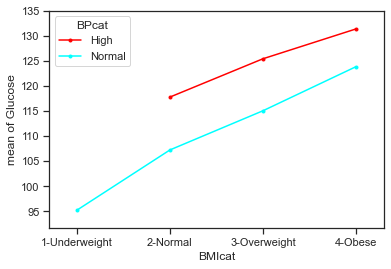

In [40]:
fig = interaction_plot(x=df['BMIcat'], trace=df['BPcat'], response=df['Glucose'])
plt.show()

## Multiple Linear Regression

In [41]:
# Comparing BMI and BP to Glucose

X = df[['BMI','BloodPressure']]
Y = df['Glucose']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print(regressor.intercept_)
print(regressor.coef_)

#making predictions
Y_pred = regressor.predict(X_test)
r2 = regressor.score(X, Y)

61.30338086536791
[0.90235259 0.42655293]


In [42]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
BMI               0.902353
BloodPressure     0.426553

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', r2)

Mean Absolute Error: 23.522593580322486
Mean Squared Error: 926.7968711833088
Root Mean Squared Error: 30.443338699677945
R-squared: 0.08235154582932114


In [44]:
prediction = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
prediction.head()

Actual   Predicted
661     199  132.432330
122     107  123.187345
113      76  118.429651
14      166  115.295889
529     111  111.227195

In [45]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 661 to 380
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     154 non-null    int64  
 1   Predicted  154 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.6 KB


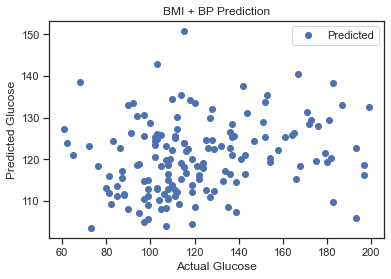

In [46]:
#plotting
prediction.plot(x='Actual', y='Predicted', style='bo')
plt.title('BMI + BP Prediction')
plt.xlabel('Actual Glucose')
plt.ylabel('Predicted Glucose')
plt.show()

# Continuation of work for Final
Things to do


Minor component of the larger-scale implications of the study

P-values and standard deviation not organized in properly formatted table - done above and in write-up

Confidence intervals, Parameter estimates, effect sizes not calculated or discussed. - done and in write-up

Add a ANCOVA analysis with ANCOVA

Explore a power analysis universe given a variety of effect sizes, Type II error and sample sizes for this dataset. Comment critically on this in your writeup.


# ANCOVA

In [47]:
from dfply import *

In [48]:
df >> group_by(X.BMIcat) >> summarize(n=X["Glucose"].count(), mean = X["Glucose"].mean(), std = X["Glucose"].std())

BMIcat    n        mean        std
0  1-Underweight    4   95.250000   8.808140
1       2-Normal  102  109.029412  25.112994
2   3-Overweight  179  116.944134  27.159066
3        4-Obese  483  126.320911  31.657702

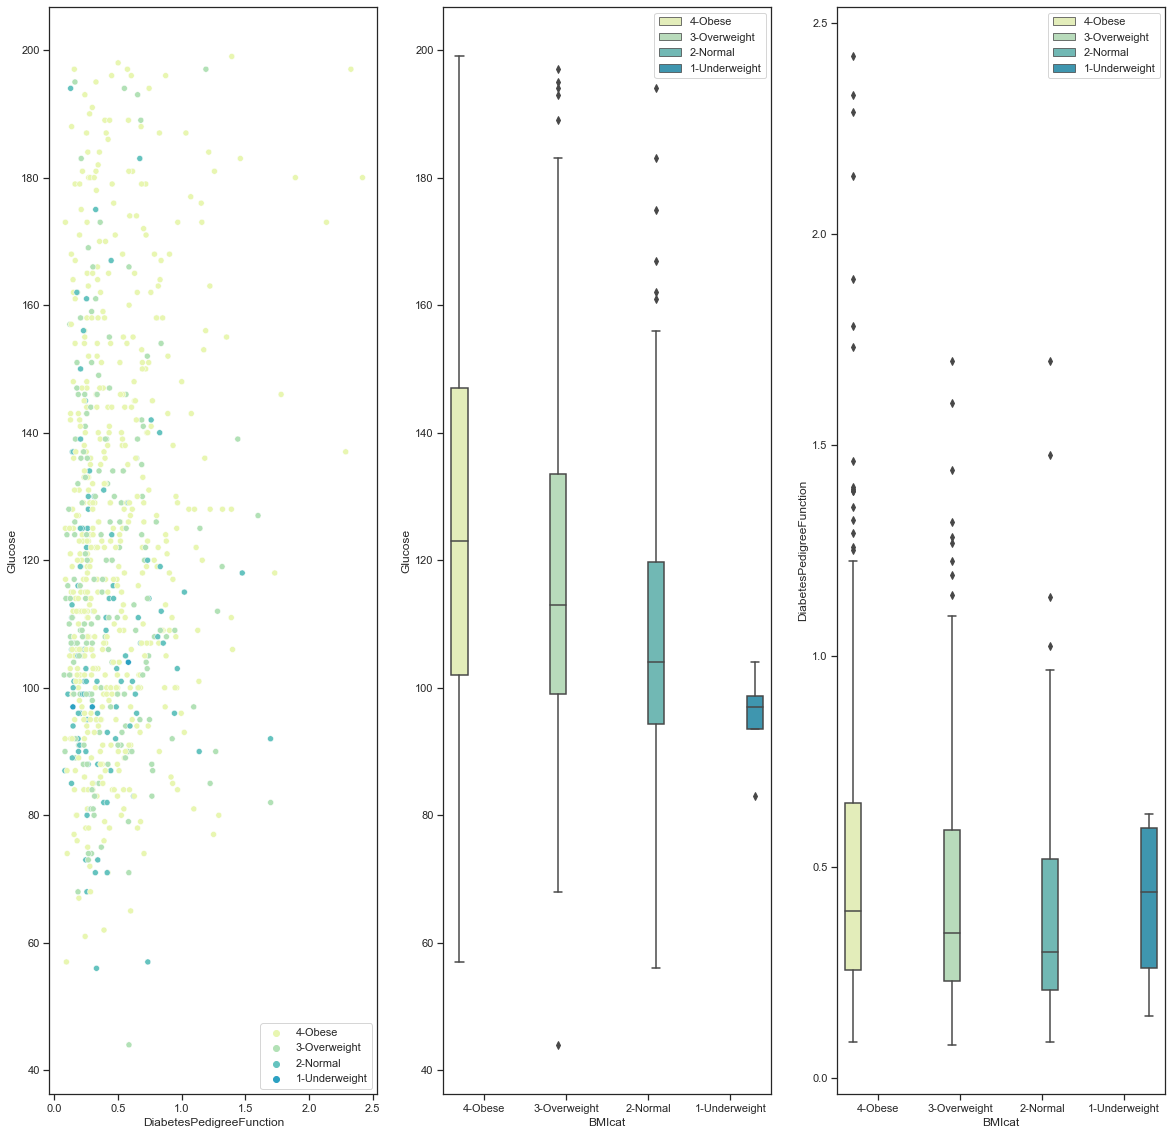

In [70]:
fig, axs = plt.subplots(ncols=3)
rcParams['figure.figsize'] = 20,20
sns.scatterplot(data=df, x="DiabetesPedigreeFunction", y="Glucose", hue=df.BMIcat.tolist(), ax=axs[0])
sns.boxplot(data=df, x="BMIcat", y="Glucose", hue=df.BMIcat.tolist(), ax=axs[1])
sns.boxplot(data=df, x="BMIcat", y="DiabetesPedigreeFunction", hue=df.BMIcat.tolist(), ax=axs[2])
plt.show()

In [50]:
from pingouin import ancova
ancova(data=df, dv='Glucose', covar='DiabetesPedigreeFunction', between='BMIcat')

Source             SS   DF          F         p-unc  \
0                    BMIcat   29640.487972    3  11.275824  3.037349e-07   
1  DiabetesPedigreeFunction    9730.443475    1  11.104956  9.024572e-04   
2                  Residual  668559.918430  763        NaN           NaN   

        np2  
0  0.042453  
1  0.014346  
2       NaN

In [51]:
from dfply import *
df >> group_by(X.BPcat) >> summarize(n=X["Glucose"].count(), mean = X["Glucose"].mean(), std = X["Glucose"].std())

BPcat    n        mean        std
0    High  205  129.365854  29.100027
1  Normal  563  118.877442  30.492533

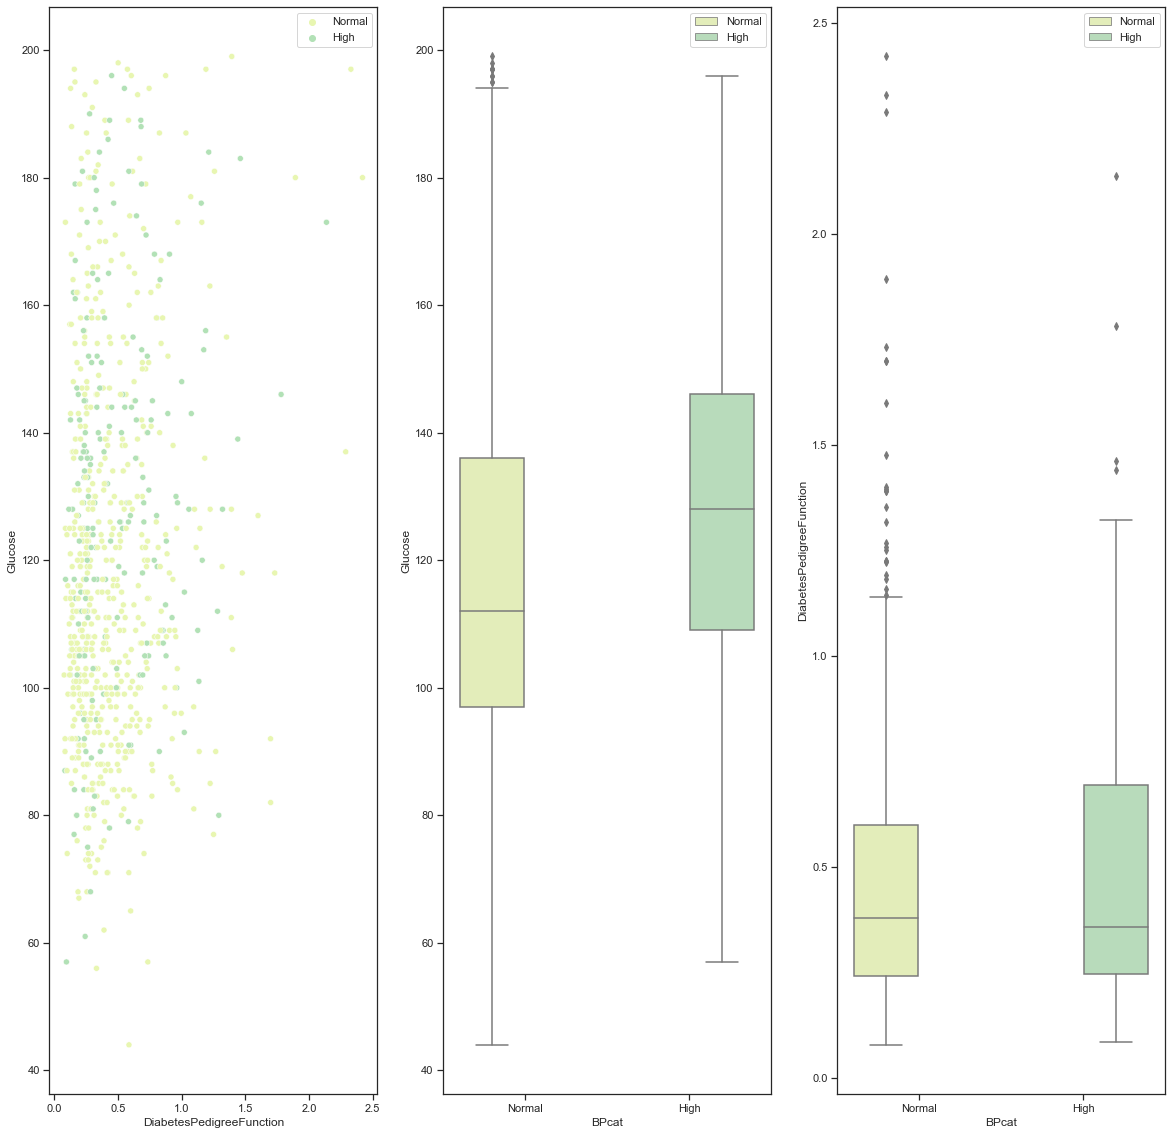

In [52]:
fig, axs = plt.subplots(ncols=3)
rcParams['figure.figsize'] = 20,20
sns.scatterplot(data=df, x="DiabetesPedigreeFunction", y="Glucose", hue=df.BPcat.tolist(), ax=axs[0])
sns.boxplot(data=df, x="BPcat", y="Glucose", hue=df.BPcat.tolist(), ax=axs[1])
sns.boxplot(data=df, x="BPcat", y="DiabetesPedigreeFunction", hue=df.BPcat.tolist(), ax=axs[2])
plt.show()

In [53]:
from pingouin import ancova
ancova(data=df, dv='Glucose', covar='DiabetesPedigreeFunction', between='BPcat')

Source             SS   DF          F     p-unc       np2
0                     BPcat   15364.270222    1  17.213012  0.000037  0.022006
1  DiabetesPedigreeFunction   12457.968314    1  13.957003  0.000201  0.017918
2                  Residual  682836.136179  765        NaN       NaN       NaN

# Power Analysis

In [54]:
normaldf = df[df['Gluccat']=="Normal"]
highdf = df[df['Gluccat']=="High"]

In [55]:
print(df['Gluccat'].value_counts().sort_index())

High      299
Normal    469
Name: Gluccat, dtype: int64


In [56]:
#Comparing means of each variable against glucose level
pg.ttest(highdf['BMI'], normaldf['BMI'], correction=False)

T  dof alternative         p-val         CI95%   cohen-d  \
T-test  6.244902  766   two-sided  7.024675e-10  [2.13, 4.08]  0.462151   

             BF10  power  
T-test  1.093e+07    1.0

In [57]:
# parameters for the analysis 
effect_size = 0.462151 # from 
alpha = 0.05 # significance level
nobs = 299 # chosen to consider high power

power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size = effect_size, 
                                         nobs1 = nobs, 
                                         alpha = alpha)

print('Power for High Glucose Level {0:.2f}'.format(power))

Power for High Glucose Level 1.00


In [58]:
# parameters for the analysis 
effect_size = 0.462151 # from 
alpha = 0.05 # significance level
nobs = 469 # chosen to consider high power

power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size = effect_size, 
                                         nobs1 = nobs, 
                                         alpha = alpha)

print('Power for Normal Glucose Level {0:.2f}'.format(power))

Power for Normal Glucose Level 1.00


In [59]:
pg.ttest(highdf['BloodPressure'], normaldf['BloodPressure'], correction=False)

T  dof alternative         p-val        CI95%   cohen-d  \
T-test  6.785959  766   two-sided  2.309365e-11  [4.2, 7.62]  0.502192   

            BF10  power  
T-test  2.94e+08    1.0

In [60]:
# parameters for the analysis 
effect_size = 0.502192 # from 
alpha = 0.05 # significance level
nobs = 299 # chosen to consider high power

power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size = effect_size, 
                                         nobs1 = nobs, 
                                         alpha = alpha)

print('Power for High Glucose Level {0:.2f}'.format(power))

Power for High Glucose Level 1.00


In [61]:
# parameters for the analysis 
effect_size = 0.502192 # from 
alpha = 0.05 # significance level
nobs = 469 # chosen to consider high power

power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size = effect_size, 
                                         nobs1 = nobs, 
                                         alpha = alpha)

print('Power for High Glucose Level {0:.2f}'.format(power))

Power for High Glucose Level 1.00


In [62]:
# parameters for the analysis 
effect_size = 0.8 # chosen to evaluate high effect
alpha = 0.05 # significance level
power = 0.8 # chosen to consider high power

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 25.52


In [63]:
es_pwr = []
es_pwr= [0.2,0],[0.48,0],[0.5,0],[0.8,0]
data_size=len(df)
i=0
while i < len(es_pwr):
    power_analysis = TTestIndPower()
    power = power_analysis.solve_power(effect_size = es_pwr[i][0], 
                                         nobs1 = data_size, 
                                         alpha = alpha)
    es_pwr[i][1] = round(power,4)
    i+=1
print(es_pwr)

([0.2, 0.9748], [0.48, 1.0], [0.5, 1.0], [0.8, 1.0])


The result above shows the achievable power given the various effect sizes for this dataset

In [64]:
pwr_es = []
pwr_es= [0.2,0],[0.5,0],[0.8,0],[0.99,0]
data_size=len(df)
i=0
while i < len(pwr_es):
    power_analysis = TTestIndPower()
    es = power_analysis.solve_power(power = pwr_es[i][0], 
                                         nobs1 = data_size, 
                                         alpha = alpha)
    pwr_es[i][1] = round(es,4)
    i+=1
print(pwr_es)

([0.2, 0.0569], [0.5, 0.1001], [0.8, 0.1431], [0.99, 0.2189])


In [65]:
# parameters for the analysis 
alpha = 0.05 # significance level
es=(0.2,0.5,0.8)
pwr=(0.2,0.5,0.8)
i=j=0
while i < len(pwr):
    while j < len(es):
        power_analysis = TTestIndPower()
        sample_size = power_analysis.solve_power(effect_size = es[j], 
                                         power = pwr[i], 
                                         alpha = alpha)
        print('Required sample size for power', pwr[i],' and effect size', es[j],' = ', round(sample_size,0))
        j+=1
    j=0
    i+=1


Required sample size for power 0.2  and effect size 0.2  =  63.0
Required sample size for power 0.2  and effect size 0.5  =  11.0
Required sample size for power 0.2  and effect size 0.8  =  5.0
Required sample size for power 0.5  and effect size 0.2  =  193.0
Required sample size for power 0.5  and effect size 0.5  =  32.0
Required sample size for power 0.5  and effect size 0.8  =  13.0
Required sample size for power 0.8  and effect size 0.2  =  393.0
Required sample size for power 0.8  and effect size 0.5  =  64.0
Required sample size for power 0.8  and effect size 0.8  =  26.0


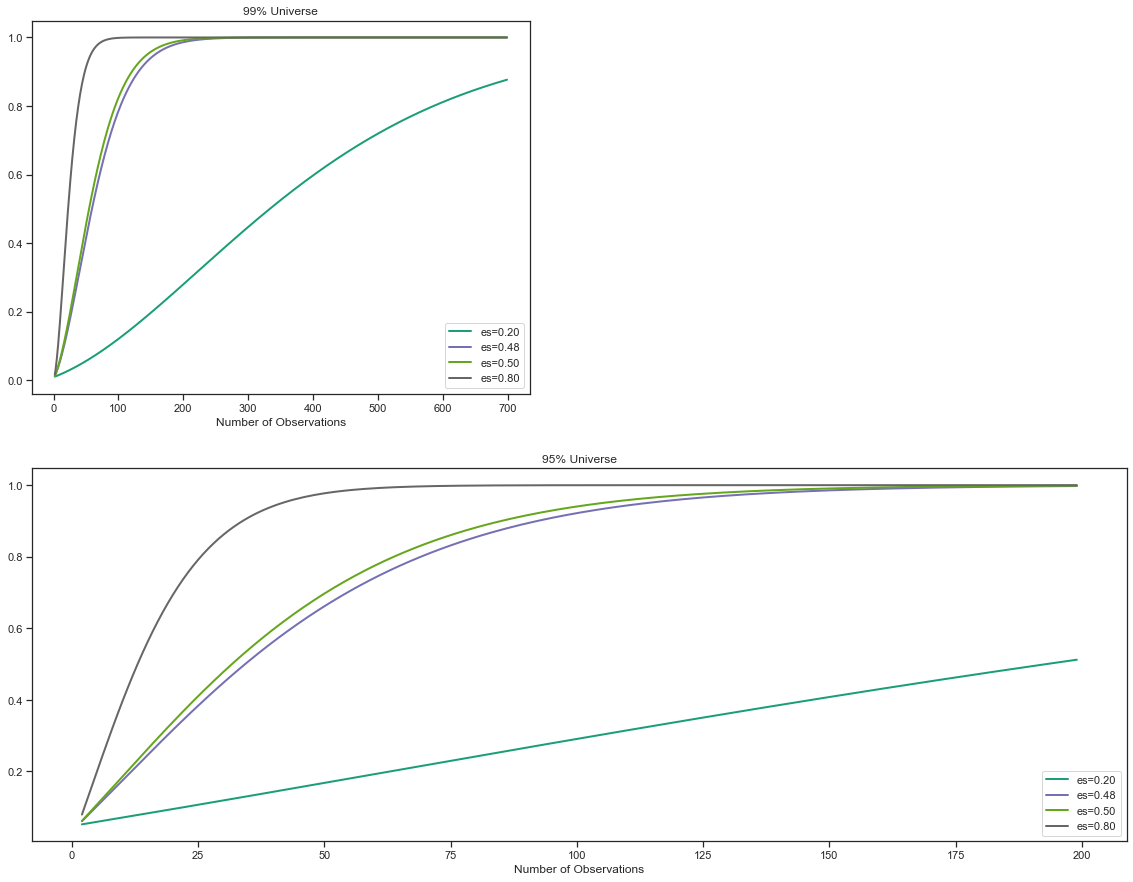

In [66]:
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                               nobs = np.arange(2,700),
                               effect_size=[x[0] for x in es_pwr],
                               alpha=0.01,
                               ax =ax, title='99% Universe')
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                               nobs = np.arange(2,200),
                               effect_size=[x[0] for x in es_pwr],
                               alpha=0.05,
                               ax =ax, title='95% Universe')
fig.subplots_adjust(top = 2.5, right = 2.5)

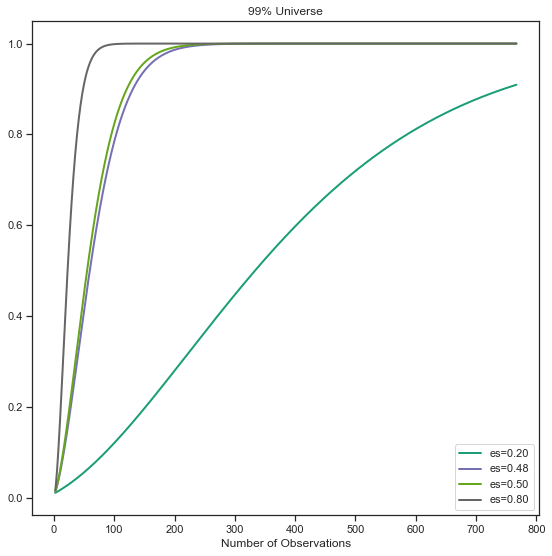

In [67]:
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']
rcParams['figure.figsize'] = 20,20
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                               nobs = np.arange(2,data_size),
                               effect_size=[x[0] for x in es_pwr],
                               alpha=0.01,
                               ax =ax, title='99% Universe')

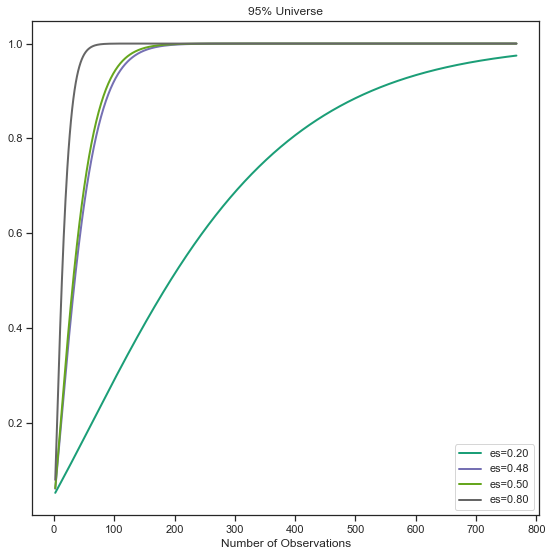

In [68]:
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']
rcParams['figure.figsize'] = 20,20
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                               nobs = np.arange(2,data_size),
                               effect_size=[x[0] for x in es_pwr],
                               alpha=0.05,
                               ax =ax, title='95% Universe')

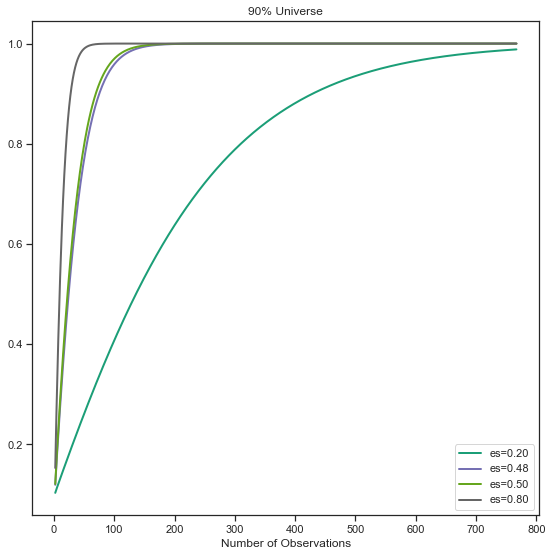

In [69]:
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']
rcParams['figure.figsize'] = 20,20
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                               nobs = np.arange(2,data_size),
                               effect_size=[x[0] for x in es_pwr],
                               alpha=0.1,
                               ax =ax, title='90% Universe')